[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AcousticOdometry/AO/blob/main/notebooks/plot_features.ipynb)


In [64]:
!which gcc

/usr/bin/gcc


# Setup


## Install AO


In [80]:
%%capture
try:
    import colab
    COLAB_RUNTIME = True
    GITHUB_TOKEN = None
    # Check CMake >= 3.21
    v_str, *_ = !cmake --version
    if 'command not found' in v_str:
        major = 0
        minor = 0
    else:
        major, minor, _ = (int(x) for x in v_str.split(' ')[-1].split('.'))
    if major < 3 or minor < 21:
        # https://cmake.org/download/
        %cd /tmp
        !wget https://github.com/Kitware/CMake/releases/download/v3.22.3/cmake-3.22.3-linux-x86_64.sh
        !sudo mkdir /opt/cmake
        !sudo sh ./cmake-3.22.3-linux-x86_64.sh --prefix=/opt/cmake \
            --skip-license
        %cd /content
        !update-alternatives --install /usr/local/bin/cmake cmake \
            /opt/cmake/bin/cmake 20 --force
    # Check GCC >= 11
    v_str, *_ = !gcc --version
    if 'command not found' in v_str:
        major = 0
    else:
        major, *_ = (int(x) for x in v_str.split(' ')[-1].split('.'))
    if major < 11:
        !apt update
        !apt install software-properties-common
        !add-apt-repository ppa:ubuntu-toolchain-r/test -y
        !apt install gcc-11 g++-11
        !apt install --only-upgrade libstdc++6
        !update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 70 \
            --slave /usr/bin/g++ g++ /usr/bin/g++-7
        !update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-11 110 \
            --slave /usr/bin/g++ g++ /usr/bin/g++-11
        !apt install --only-upgrade libstdc++-11-dev
        %env LD_LIBRARY_PATH=/usr/lib/gcc/x86_64-linux-gnu/11/
except ImportError:
    COLAB_RUNTIME = False

In [71]:
!strings /usr/lib/x86_64-linux-gnu/libstdc++.so.6 | grep GLIBCXX

GLIBCXX_3.4
GLIBCXX_3.4.1
GLIBCXX_3.4.2
GLIBCXX_3.4.3
GLIBCXX_3.4.4
GLIBCXX_3.4.5
GLIBCXX_3.4.6
GLIBCXX_3.4.7
GLIBCXX_3.4.8
GLIBCXX_3.4.9
GLIBCXX_3.4.10
GLIBCXX_3.4.11
GLIBCXX_3.4.12
GLIBCXX_3.4.13
GLIBCXX_3.4.14
GLIBCXX_3.4.15
GLIBCXX_3.4.16
GLIBCXX_3.4.17
GLIBCXX_3.4.18
GLIBCXX_3.4.19
GLIBCXX_3.4.20
GLIBCXX_3.4.21
GLIBCXX_3.4.22
GLIBCXX_3.4.23
GLIBCXX_3.4.24
GLIBCXX_3.4.25
GLIBCXX_3.4.26
GLIBCXX_3.4.27
GLIBCXX_3.4.28
GLIBCXX_3.4.29
GLIBCXX_DEBUG_MESSAGE_LENGTH


In [84]:
%pip uninstall ao -y

Found existing installation: ao 0.0.1
Uninstalling ao-0.0.1:
  Successfully uninstalled ao-0.0.1


In [79]:
!apt install --only-upgrade libstdc++-11-dev
%env LD_LIBRARY_PATH=/usr/lib/gcc/x86_64-linux-gnu/11/
import ao

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libstdc++-11-dev is already the newest version (11.1.0-1ubuntu1~18.04.1).
The following packages were automatically installed and are no longer required:
  linux-headers-4.15.0-173 linux-headers-4.15.0-173-generic
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
env: LD_LIBRARY_PATH=/usr/lib/gcc/x86_64-linux-gnu/11/


ImportError: ignored

In [93]:
!python -m site

sys.path = [
    '/content',
    '/env/python',
    '/usr/lib/python37.zip',
    '/usr/lib/python3.7',
    '/usr/lib/python3.7/lib-dynload',
    '/usr/local/lib/python3.7/dist-packages',
    '/usr/lib/python3/dist-packages',
]
USER_BASE: '/root/.local' (exists)
USER_SITE: '/root/.local/lib/python3.7/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


In [95]:
if COLAB_RUNTIME:
    from getpass import getpass
    if not GITHUB_TOKEN:
        GITHUB_TOKEN = getpass(
            "Personal access token\n"
            r"https://docs.github.com/en/authentication/keeping-your-account-"
            r"and-data-secure/creating-a-personal-access-token"+"\n"
            )
    !git clone https://$GITHUB_TOKEN@github.com/AcousticOdometry/AO
    try:
        import ao
    except ImportError:
        GITHUB_TOKEN = None
        raise
else:
    try:
        import ao
    except ImportError:
        raise ImportError(
            "Acoustic Odometry python extension is not installed. Check "
            r"https://github.com/AcousticOdometry/AO#readme"
            " for detailed instructions."
            )

Personal access token
https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token
··········
Cloning into 'AO'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 274 (delta 125), reused 215 (delta 78), pack-reused 0
Receiving objects: 100% (274/274), 405.74 KiB | 4.14 MiB/s, done.
Resolving deltas: 100% (125/125), done.


ImportError: ignored

In [99]:
%pip uninstall ao -y
%pip install AO[test]

## Other packages


In [ ]:
import ao
import math
import numpy as np

from matplotlib import pyplot as plt

# Validation


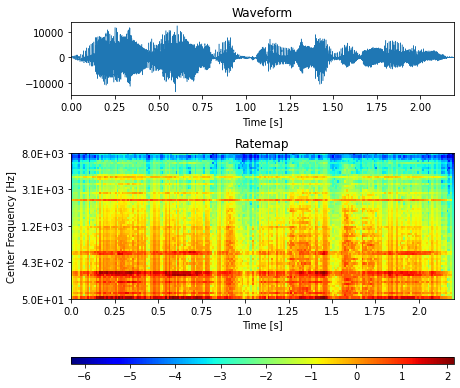

In [ ]:
audio_url = (
    r"https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources"
    r"/ratemap/t29_lwwj2n_m17_lgwe7s.wav"
    )
data, sample_rate = ao.io.wave_read(audio_url)
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
fig, axs = plt.subplots(
    3, 1, figsize=(6.5, 5.5), gridspec_kw={'height_ratios': [0.5, 1, 0.05]}
    )
# Signal
ao.plot.signal(data, sample_rate, ax=axs[0])
axs[0].set_title('Waveform')
# Gammatonegram
frame_length = 10  # [ms]
frame_samples = math.ceil(frame_length / 1000 * sample_rate)
plot, _ = ao.plot.gammatonegram(
    data,
    sample_rate,
    frame_samples,
    num_features=64,
    low_Hz=50,
    high_Hz=8000,
    ax=axs[1]
    )
axs[1].set_title('Ratemap')
fig.colorbar(plot, cax=axs[2], orientation="horizontal")
fig.tight_layout()

![Ratemap](https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources/ratemap/ratemap.png)


In [ ]:
# TODO Check if we are in google colab -> use drive or not -> ask for path

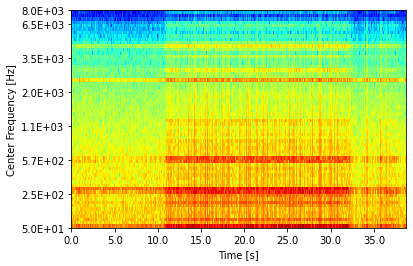

In [ ]:
# 10 deg/s + 10 kg load
data, sample_rate = ao.io.wave_read(
    r"C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment"
    r"\VAO_2022-03-08_17-24-33\audio0.wav"
    )
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
plot, ax = ao.plot.gammatonegram(
    data, sample_rate, frame_samples, num_features=64, low_Hz=50, high_Hz=8000
    )

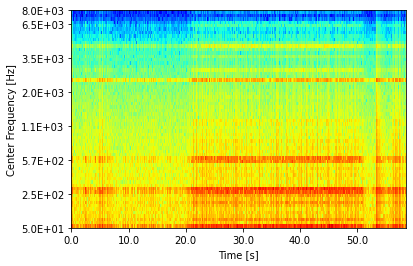

In [ ]:
# 20 deg/s + 10 kg load
data, sample_rate = ao.io.wave_read(
    r"C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment"
    r"\VAO_2022-03-08_17-21-32\audio0.wav"
    )
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
plot, ax = ao.plot.gammatonegram(
    data, sample_rate, frame_samples, num_features=64, low_Hz=50, high_Hz=8000
    )